<type 'numpy.ndarray'>
1000 [ 2.14646554] [ 2.56760979] 0 10
<type 'numpy.ndarray'>
2000 [ 2.04609513] [ 2.89274263] 0 10
<type 'numpy.ndarray'>
3000 [ 2.02655101] [ 2.9560554] 0 10
<type 'numpy.ndarray'>
4000 [ 2.0257628] [ 2.95861053] 0 10


KeyboardInterrupt: 

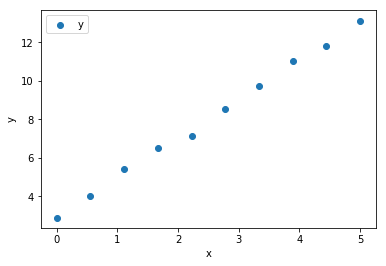

In [99]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

learning_rate=0.01
batch_size = 100

x = tf.placeholder(tf.float32, shape=(None, 1))
w = tf.Variable(tf.random_normal([1],stddev=0.1))
b = tf.Variable(tf.random_normal([1], stddev=0.1))
#y = tf.matmul(x,w) + b
y = x*w + b


#generate data
size = 10
X = np.linspace(0, 5, size)
Y = 2 * X + 3 + np.random.normal(0, 0.3, size)
plt.scatter(X, Y)
plt.legend('y~2x+3 with noise')
plt.xlabel("x")
plt.ylabel("y")

y_ = tf.placeholder(tf.float32, shape=(None, 1))
loss = tf.reduce_sum(tf.pow(y-y_, 2))/size
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)



s = tf.Session()
init = tf.global_variables_initializer()
s.run(init)


for i in xrange(10000):
    start = (i*batch_size) % size
    end = min(start+batch_size, size)
    #s.run(X.shape)
    #print start, end
    xin = X[start:end].reshape(end-start, 1)#.transpose()
    yin = Y[start:end].reshape(end-start, 1)#.transpose()
    s.run(optimizer, feed_dict={x: xin, y_:yin})
    if i%1000 == 999:
        #print type(xin)
        print i+1, s.run(w), s.run(b), start, end

XT = np.linspace(0, 5, 100)
YT = s.run(w)*XT + s.run(b)
plt.plot(XT, YT, 'r-')
s = 'y=%.2fx +%.2f' % (s.run(w), s.run(b))
plt.title(s)
plt.show()
